In [ ]:
import sys 
sys.path.append("..") 
from bias.utils import *
from bias.algorithms import *

In [ ]:
import pathlib
import pandas as pd
import numpy as np

In [ ]:
np.random.seed(42)

In [ ]:
file_path = pathlib.Path.cwd().parent/'HCUP'/'NIS_2012_Core.csv'
HCUP_data_2012 = load_datafile(pathlib.Path(file_path), n=1000000, seed=42)
HCUP_data_2012

,AGE,AMONTH,DIED,DISPUNIFORM,DRG24,FEMALE,HCUP_ED,LOS,MDC24,NCHRONIC,...,NECODE,NEOMAT,NPR,ORPROC,RACE,TOTCHG,TRAN_IN,TRAN_OUT,YEAR,ZIPINC_QRTL
0,24,1,0,1,371,1,0,3,14,1,...,0,1,2,1,1,7620,0,0,2012,3
1,0,11,0,1,390,0,0,3,15,0,...,0,2,1,0,3,3551,0,0,2012,1
2,0,6,0,1,390,1,0,2,15,1,...,0,2,0,0,1,2794,0,0,2012,3
3,79,3,0,1,125,1,1,2,5,3,...,0,0,3,0,1,30402,0,0,2012,4
4,55,5,0,7,464,0,1,2,23,3,...,0,0,0,0,1,8083,0,0,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296963,42,10,0,1,167,0,4,1,6,1,...,0,0,1,1,1,17759,0,0,2012,4
7296964,17,6,0,1,167,0,4,1,6,0,...,0,0,1,1,3,14594,0,0,2012,4
7296965,0,12,0,2,385,0,0,0,15,0,...,0,2,0,0,1,1551,0,1,2012,3
7296966,49,8,0,1,519,1,0,1,8,4,...,0,0,4,1,1,32764,0,0,2012,4


In [ ]:
HCUP_data_2012.dropna().describe(percentiles=[]).T

,count,mean,std,min,50%,max
AGE,6542084.0,48.930747,27.497790,0.0,54.0,90.0
AMONTH,6542084.0,6.463549,3.456839,1.0,6.0,12.0
DIED,6542084.0,0.018429,0.134496,0.0,0.0,1.0
DISPUNIFORM,6542084.0,2.554614,3.633837,1.0,1.0,99.0
DRG24,6542084.0,313.410821,163.421504,1.0,370.0,579.0
FEMALE,6542084.0,0.578804,0.493751,0.0,1.0,1.0
HCUP_ED,6542084.0,0.824339,1.110663,0.0,1.0,4.0
LOS,6542084.0,4.511374,6.537480,0.0,3.0,365.0
MDC24,6542084.0,9.892571,5.682960,0.0,8.0,25.0
NCHRONIC,6542084.0,4.201137,3.552820,0.0,4.0,31.0


In [ ]:
file_path = pathlib.Path.cwd().parent/'HCUP'/'NIS_2014_Core.csv'
HCUP_data_2014 = load_datafile(pathlib.Path(file_path), n=1000000, seed=42)
HCUP_data_2014

,AGE,AMONTH,DIED,DISPUNIFORM,DRG24,FEMALE,HCUP_ED,LOS,MDC24,NCHRONIC,...,NECODE,NEOMAT,NPR,ORPROC,RACE,TOTCHG,TRAN_IN,TRAN_OUT,YEAR,ZIPINC_QRTL
0,64,9,0,1,277,0,2,3,9,5,...,1,0,0,0,1,18917,0,0,2014,4
1,32,9,0,1,494,0,2,5,7,4,...,0,0,5,1,3,62880,0,0,2014,3
2,74,8,0,6,127,1,2,6,5,5,...,1,0,0,0,1,31167,0,0,2014,3
3,82,5,0,1,519,0,0,1,8,11,...,0,0,4,1,1,34710,0,0,2014,4
4,65,4,0,5,138,1,2,9,5,8,...,1,0,0,0,1,32540,0,2,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071757,82,2,0,1,576,0,1,8,18,1,...,0,0,1,0,1,54597,0,0,2014,<NA>
7071758,59,8,0,1,477,0,1,3,9,11,...,2,0,2,1,1,42361,0,0,2014,2
7071759,71,11,0,1,576,0,1,12,18,8,...,0,0,1,0,4,78458,0,0,2014,3
7071760,60,4,0,1,188,0,0,1,6,4,...,0,0,0,0,4,9592,2,0,2014,4


In [ ]:
HCUP_data_2014.dropna().describe(percentiles=[]).T

,count,mean,std,min,50%,max
AGE,6327968.0,49.050403,27.394445,0.0,54.0,90.0
AMONTH,6327968.0,6.515382,3.457158,1.0,7.0,12.0
DIED,6327968.0,0.019037,0.136656,0.0,0.0,1.0
DISPUNIFORM,6327968.0,2.621526,3.658227,1.0,1.0,99.0
DRG24,6327968.0,318.398321,164.698301,1.0,371.0,579.0
FEMALE,6327968.0,0.574917,0.494356,0.0,1.0,1.0
HCUP_ED,6327968.0,0.762162,1.002015,0.0,1.0,4.0
LOS,6327968.0,4.617150,6.702159,0.0,3.0,365.0
MDC24,6327968.0,10.077327,5.707276,0.0,9.0,25.0
NCHRONIC,6327968.0,4.488157,3.742389,0.0,4.0,29.0


In [ ]:
processed_data = peprocessing(pd.concat([HCUP_data_2012, HCUP_data_2014]),
                              statistics=True)

                  count       mean           std     min      50%        max
AGE          12870052.0  48.989580     27.447090     0.0     54.0       90.0
AMONTH       12870052.0   6.489034      3.457093     1.0      7.0       12.0
DIED         12870052.0   0.018728      0.135563     0.0      0.0        1.0
DISPUNIFORM  12870052.0   2.587513      3.646003     1.0      1.0       99.0
DRG24        12870052.0 -17.854861    164.069465     1.0    371.0      579.0
FEMALE       12870052.0   0.576893      0.494052     0.0      1.0        1.0
HCUP_ED      12870052.0   0.793768      1.059093     0.0      1.0        4.0
LOS          12870052.0   4.563382      6.619173     0.0      3.0      365.0
MDC24        12870052.0   9.983412      5.695677     0.0      8.0       25.0
NCHRONIC     12870052.0   4.342260      3.650080     0.0      4.0       31.0
NDX          12870052.0   9.421624      6.206883     0.0      8.0       74.0
NECODE       12870052.0   0.271713      0.706598     0.0      0.0       16.0

In [ ]:
train_data = processed_data[processed_data['YEAR'] == 2012]
test_data = processed_data[processed_data['YEAR'] == 2014]

# Race

In [ ]:
protected = 'race'
print(train_data['RACE'].value_counts(dropna=False))

1    4368637
2     954352
3     758897
6     244667
4     169822
5      45709
Name: RACE, dtype: int64


In [ ]:
print(test_data['RACE'].value_counts(dropna=False))

1    4209717
2     929298
3     752762
6     222410
4     175989
5      37790
Name: RACE, dtype: int64


In [ ]:
objective = Objective(train_data,
                      test_data=test_data,
                      protected=protected)
metric_AUPRC = dict()
metric_DI = dict()
DI_table = dict()
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]] = list()
    metric_DI[objective.percentiles_str_list[i]] = list()
    DI_table[objective.percentiles_str_list[i]+'_list'] = list()

In [ ]:
model = Linear(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = Lasso(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = ElasticNet(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = Xgboost(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = Logistic(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = SVM(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

In [ ]:
label_list = ['OLS', 'RL', 'Lasso', 'Elastic', 'SVM', 'XGB', 'NN']
print(pd.DataFrame(metric_AUPRC, index=label_list).T)

          OLS        RL     Lasso   Elastic       SVM       XGB        NN
60%  0.748209  0.761192  0.747426  0.689801  0.717673  0.757813  0.759424
75%  0.634551  0.636722  0.633996  0.574227  0.591392  0.646171  0.647737
90%  0.487484  0.470529  0.487666  0.424301  0.383591  0.501118  0.500351


In [ ]:
print(pd.DataFrame(metric_DI, index=label_list).T)

          OLS        RL     Lasso   Elastic       SVM       XGB        NN
60%  0.891856  0.849001  0.892082  0.890649  0.811238  0.851968  0.864766
75%  0.878530  0.834516  0.879362  0.885505  0.800054  0.836580  0.839504
90%  0.915028  0.931410  0.915483  0.907401  0.837379  0.931033  0.938542


In [ ]:
for index in DI_table:
    print(pd.DataFrame(DI_table[index], index=label_list,
                        columns=range(1, 
                        len(DI_table[list(DI_table.keys())[0]][0])+1)))

                1         2         3         4         5         6
OLS      1.143176  0.958838  0.851666  0.889939  0.913633  0.866434
RL       1.214107  0.932031  0.794943  0.829702  0.889863  0.831180
Lasso    1.142110  0.960517  0.851323  0.890260  0.911820  0.867185
Elastic  1.147592  0.997155  0.792679  0.892687  0.913171  0.889028
SVM      1.287727  0.926392  0.706893  0.799912  0.857378  0.817244
XGB      1.205965  0.945010  0.791653  0.825590  0.891674  0.837399
NN       1.183254  0.950114  0.816279  0.843488  0.901736  0.838876
                1         2         3         4         5         6
OLS      1.166867  0.970126  0.797856  0.870321  0.895179  0.889651
RL       1.253114  0.916483  0.748021  0.828915  0.870797  0.855331
Lasso    1.166223  0.972045  0.796924  0.869180  0.901029  0.888864
Elastic  1.132278  1.041571  0.765179  0.872281  0.932484  0.913540
SVM      1.313138  0.911852  0.690502  0.791904  0.842294  0.819975
XGB      1.255372  0.917009  0.742938  0.833204 

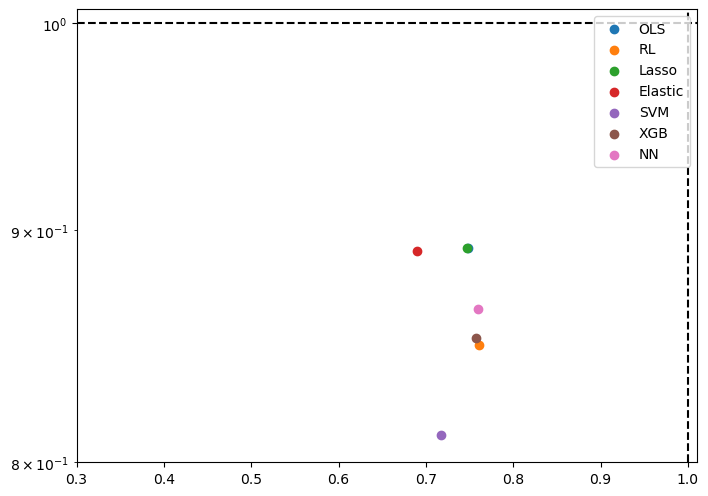

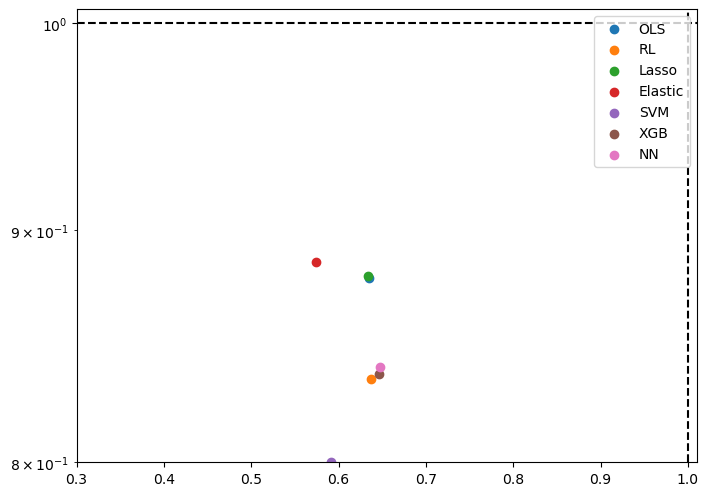

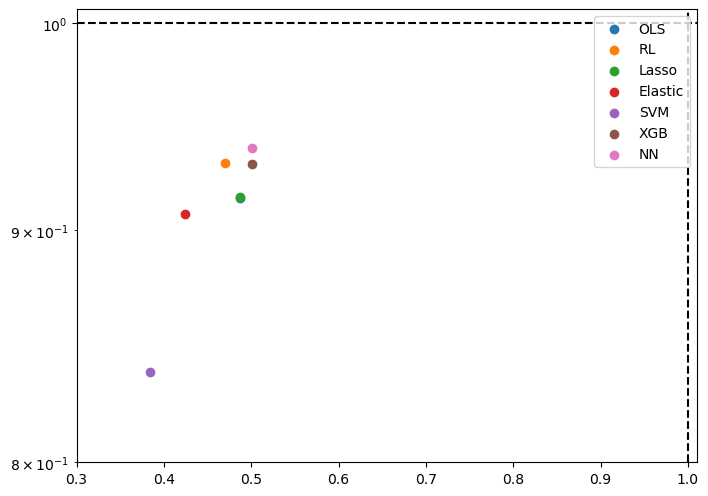

In [ ]:
for i in range(3):
    metric_plot(metric_AUPRC[objective.percentiles_str_list[i]],
                metric_DI[objective.percentiles_str_list[i]],
                label_list = label_list)

# Income

In [ ]:
protected = 'income'
print(train_data['ZIPINC_QRTL'].value_counts(dropna=False))

1    2026120
2    1623009
3    1540660
4    1352295
Name: ZIPINC_QRTL, dtype: int64


In [ ]:
print(test_data[objective.protected].value_counts(dropna=False))

1    1928644
2    1733730
3    1428264
4    1237330
Name: ZIPINC_QRTL, dtype: int64


In [ ]:
objective = Objective(train_data,
                      test_data=test_data,
                      protected=protected)
metric_AUPRC = dict()
metric_DI = dict()
DI_table = dict()
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]] = list()
    metric_DI[objective.percentiles_str_list[i]] = list()
    DI_table[objective.percentiles_str_list[i]+'_list'] = list()

In [ ]:
model = Linear(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = Lasso(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = ElasticNet(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = Xgboost(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = Logistic(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

model = SVM(objective)
for i in range(3):
    metric_AUPRC[objective.percentiles_str_list[i]].\
        append(model.AUPRC[objective.percentiles_str_list[i]])
    metric_DI[objective.percentiles_str_list[i]].\
        append(model.DI[objective.percentiles_str_list[i]])
    DI_table[objective.percentiles_str_list[i]+'_list'].\
        append(model.DI[objective.percentiles_str_list[i]+'_list'])

In [ ]:
label_list = ['OLS', 'RL', 'Lasso', 'Elastic', 'SVM', 'XGB', 'NN']
print(pd.DataFrame(metric_AUPRC, index=label_list).T)

          OLS        RL     Lasso   Elastic       SVM       XGB        NN
60%  0.748209  0.761192  0.747426  0.689801  0.717673  0.757813  0.759424
75%  0.634551  0.636722  0.633996  0.574227  0.591392  0.646171  0.647737
90%  0.487484  0.470529  0.487666  0.424301  0.383591  0.501118  0.500351


In [ ]:
print(pd.DataFrame(metric_DI, index=label_list).T)

          OLS        RL     Lasso   Elastic       SVM       XGB        NN
60%  0.965819  0.963635  0.966219  0.978607  0.969572  0.965208  0.967170
75%  0.963311  0.955656  0.964270  0.989886  0.961937  0.951928  0.952881
90%  0.980075  0.963817  0.980219  0.984391  0.973456  0.967340  0.962191


In [ ]:
for index in DI_table:
    print(pd.DataFrame(DI_table[index], index=label_list,
                        columns=range(1, 
                        len(DI_table[list(DI_table.keys())[0]][0])+1)))

                1         2         3         4
OLS      0.944572  0.995874  1.018899  1.061024
RL       0.939120  0.997445  1.025998  1.058800
Lasso    0.945142  0.996023  1.018341  1.060646
Elastic  0.969361  0.993471  1.004564  1.045272
SVM      0.946923  1.004272  1.015428  1.050739
XGB      0.944020  0.995185  1.022922  1.058179
NN       0.946171  0.996527  1.022384  1.053982
                1         2         3         4
OLS      0.945205  0.990335  1.024226  1.061320
RL       0.924066  0.998589  1.034941  1.068974
Lasso    0.946326  0.990938  1.023502  1.059750
Elastic  0.990399  0.992466  0.999479  1.023194
SVM      0.933544  1.004428  1.023547  1.060524
XGB      0.918797  0.997330  1.035100  1.078101
NN       0.921324  0.996300  1.036514  1.074169
                1         2         3         4
OLS      0.981378  0.983129  1.014845  1.030410
RL       0.952278  0.983443  1.031097  1.052532
Lasso    0.980810  0.983975  1.014929  1.030008
Elastic  1.026800  0.977959  0.989610  1

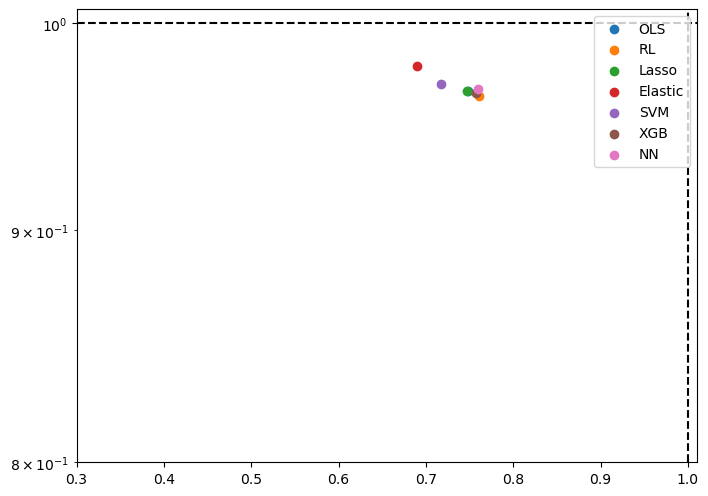

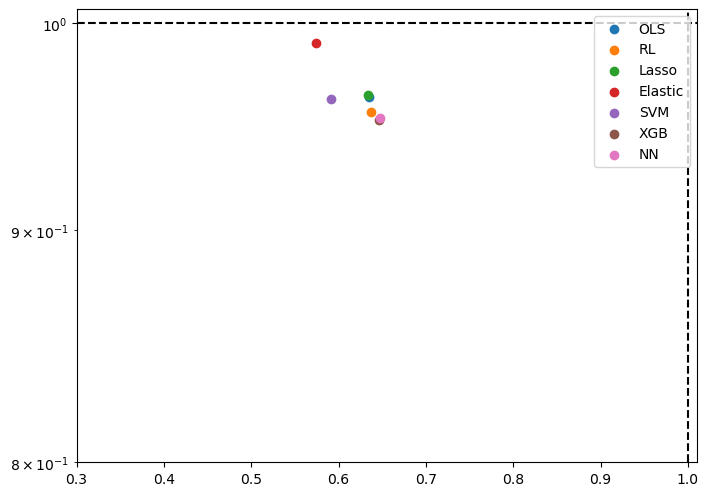

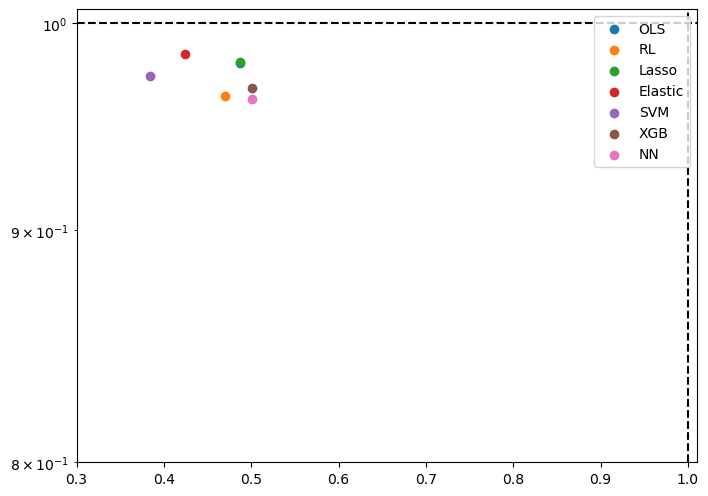

In [ ]:
for i in range(3):
    metric_plot(metric_AUPRC[objective.percentiles_str_list[i]],
                metric_DI[objective.percentiles_str_list[i]],
                label_list = label_list)